In [1]:
!pip install scanpy scvi-tools tangram-sc matplotlib seaborn --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.4/535.4 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.4 MB/s eta 0:00:00
   

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Colon_cell_atlas.h5ad to Colon_cell_atlas.h5ad


In [ ]:
import scanpy as sc

# Load the dataset
adata = sc.read_h5ad("Colon_cell_atlas.h5ad")
adata.var_names_make_unique()

# Check structure
#print(adata)
#print("Columns in metadata:\n", adata.obs.columns.tolist())

Working with .h5ad file that contains:

* Preprocessed single-cell RNA-seq data:
  * Metadata columns like region, cell_type, and donor
  * UMAP coordinates (obsm['X_umap'])
  * Expression values (logged and normalized)

Raw data has already gone through:

* Preprocessing Steps:
  * Quality control (filtering out low-quality cells or genes)
  * Normalization (to compare across cells)
  * Log transformation
  * Highly variable gene selection
  * PCA → neighborhood graph → UMAP
  * Clustering and cell type annotation


```
sc.pl.umap(adata, color=["region", "cell_type", "donor"])
```

These UMAP plots show where each cell lies in 2D space and color them by:

* region (e.g., caecum, sigmoid): where the sample was taken from

* cell_type: annotations like "CD8 T", "B cell memory", etc.

* donor: individual human samples

UMAP compresses high-dimensional gene expression data down to 2D so you can see clustering patterns.


```
sc.pl.umap(adata, color=marker_genes)
```

These show expression of key immune markers on the UMAP.

* CD3D: T cells

* CD14: Monocytes

* MS4A1: B cells

* FOXP3: Regulatory T cells

* GNLY: NK or cytotoxic T cells

Brighter areas = higher expression.

This lets you verify that:

* The cell type annotations make sense

* Markers match the labeled clusters

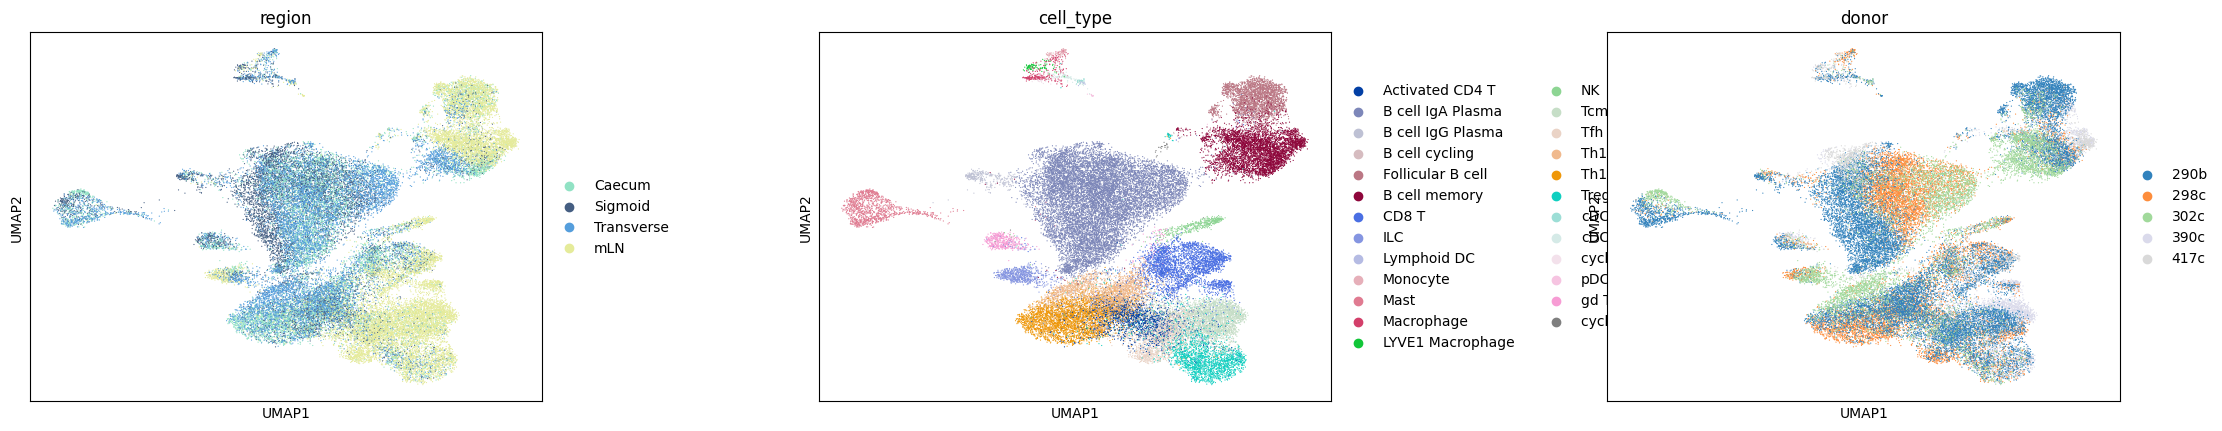

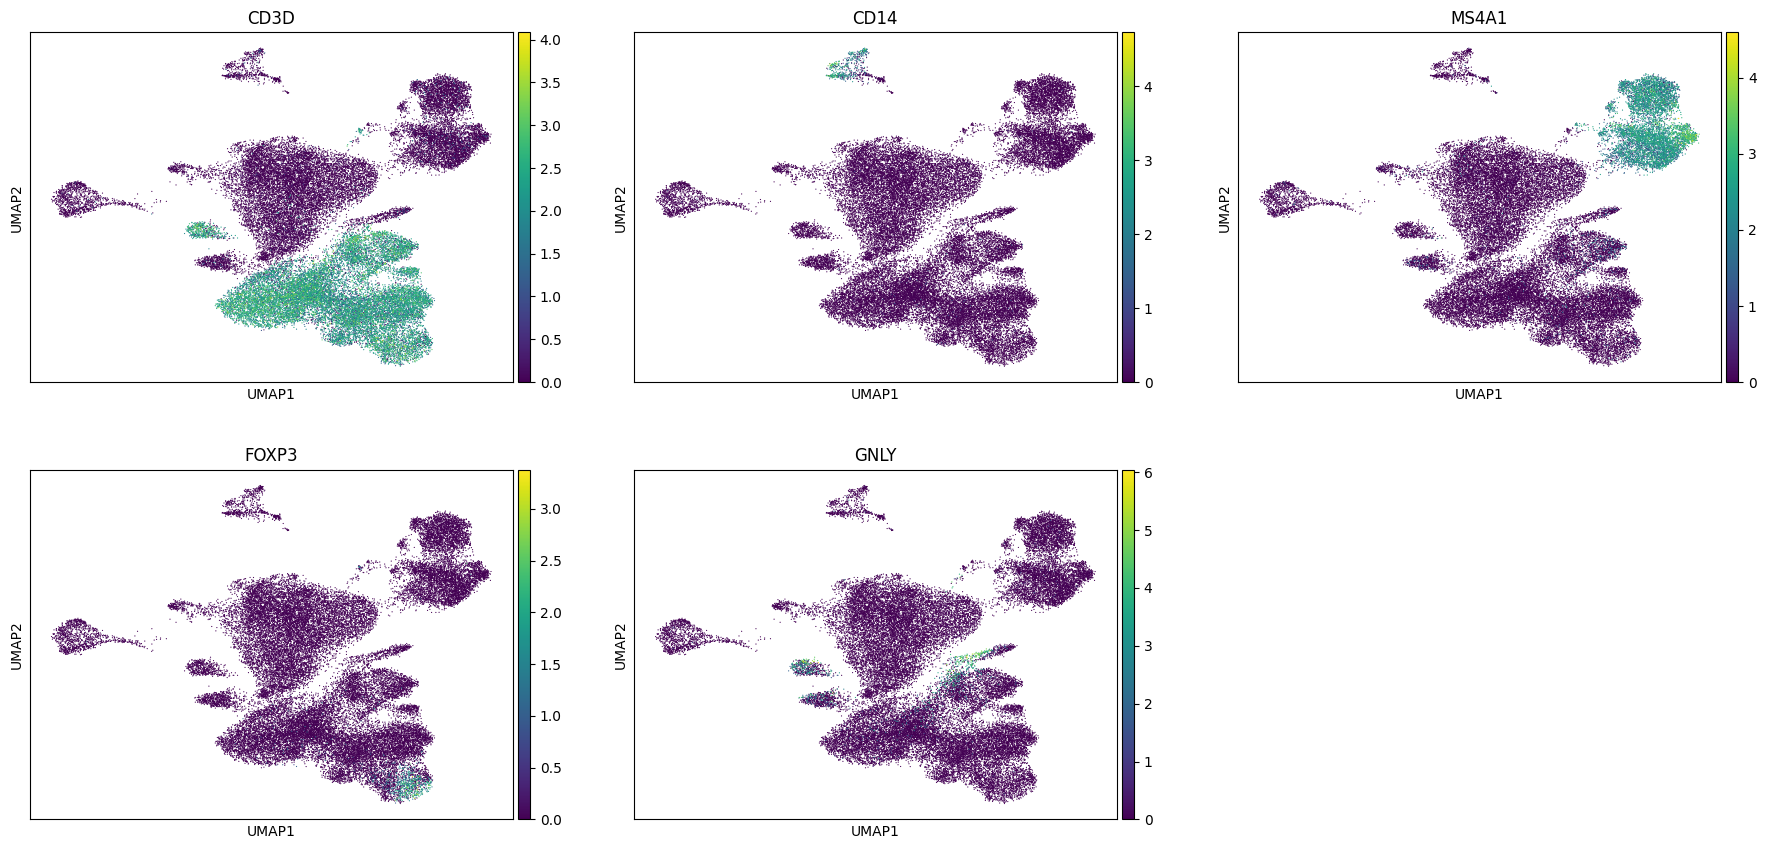

In [4]:
# UMAPs by metadata (e.g. region, cell_type)
sc.pl.umap(adata, color=["region", "cell_type", "donor"], wspace=0.4)

# Immune marker genes
marker_genes = ["CD3D", "CD14", "MS4A1", "FOXP3", "GNLY"]
sc.pl.umap(adata, color=marker_genes, ncols=3)
